# Linear Regression

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [21]:
df = pd.read_csv('weight-height.csv')

In [22]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<AxesSubplot:title={'center':'Weight / Height'}, xlabel='Height', ylabel='Weight'>

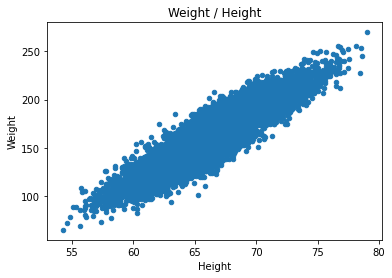

In [23]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight / Height')

In [24]:
X = df[['Height']].values
y_true = df['Weight'].values

In [25]:
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

## Linear Regression with Keras

In [26]:
# !pip install tensorflow

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# from keras.optimizers import Adam

In [29]:
model = Sequential()

In [30]:
model.add(Dense(1, input_shape=(1,)))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

C:\Users\gribanov\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [33]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
313/313 [==============================] - 0s 444us/step - loss: 644.2280
Epoch 2/40
313/313 [==============================] - 0s 444us/step - loss: 523.0410
Epoch 3/40
313/313 [==============================] - 0s 448us/step - loss: 481.6870
Epoch 4/40
313/313 [==============================] - 0s 451us/step - loss: 423.0427
Epoch 5/40
313/313 [==============================] - 0s 446us/step - loss: 385.9061
Epoch 6/40
313/313 [==============================] - 0s 436us/step - loss: 361.0214
Epoch 7/40
313/313 [==============================] - 0s 435us/step - loss: 308.5078
Epoch 8/40
313/313 [==============================] - 0s 432us/step - loss: 292.5040
Epoch 9/40
313/313 [==============================] - 0s 435us/step - loss: 253.5029
Epoch 10/40
313/313 [==============================] - 0s 432us/step - loss: 245.2062
Epoch 11/40
313/313 [==============================] - 0s 435us/step - loss: 221.5487
Epoch 12/40
313/313 [==============================] - 0s 438us

In [34]:
y_pred = model.predict(X).ravel()

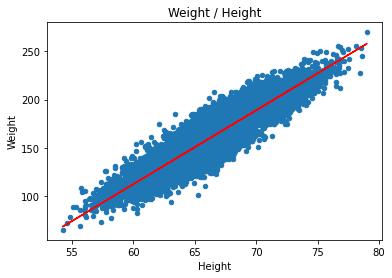

In [35]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight / Height')
plt.plot(X, y_pred, color='red')

In [36]:
W, B = model.get_weights()

In [37]:
W

array([[7.68508]], dtype=float32)

In [38]:
B

array([-348.99744], dtype=float32)

### Save Keras Model


In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.save('HeightWeight_model.h5')

### Export Model using CoreML Tools


In [41]:
from keras.models import load_model  
model = load_model('HeightWeight_model.h5')  

In [44]:
# !pip install coremltools

In [45]:
import coremltools

In [48]:
coreml_model = coremltools.converters.keras.convert(model, input_names="height", output_names="weight")

AttributeError: module 'keras.layers.normalization' has no attribute 'BatchNormalization'

In [47]:
from keras.layers.normalization.layer_normalization import *
from keras.layers.normalization.batch_normalization import *

In [25]:
coreml_model.save('HeightWeight_model.mlmodel')

### Test CoreML Model

In [26]:
coreml_model

input {
  name: "height"
  type {
    multiArrayType {
      shape: 1
      dataType: DOUBLE
    }
  }
}
output {
  name: "weight"
  type {
    multiArrayType {
      shape: 1
      dataType: DOUBLE
    }
  }
}

In [27]:
coreml_model.predict({'height' : [73.84]})

{u'weight': array([ 216.11624146])}